In [26]:
## Test
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Encode a text inputs
text1 = "Who was Jim Henson ? Jim Henson was a"
text2 = "Who was Albert Einstein ? Albert Einstein was a"
text3 = "Who is Nicolas Sarkozy ? Nicolas Sarkozy was the first French president of the 5th  "
textes = [text1, text2, text3]
for text in textes:    
    indexed_tokens = tokenizer.encode(text)
    # Convert indexed tokens in a PyTorch tensor
    tokens_tensor = torch.tensor([indexed_tokens])
    # Load pre-trained model (weights)
    model = GPT2LMHeadModel.from_pretrained('gpt2')

    model.eval()
    # Predict all tokens
    with torch.no_grad():
        outputs = model(tokens_tensor)
        predictions = outputs[0]

    # get the predicted next sub-word (in our case, the word 'man')
    predicted_index = torch.argmax(predictions[0, -1, :]).item()
    predicted_text = tokenizer.decode(indexed_tokens + [predicted_index])
    print(predicted_text)

Who was Jim Henson? Jim Henson was a man
Who was Albert Einstein? Albert Einstein was a physicist
Who is Nicolas Sarkozy?  Nicolas Sarkozy was the first French president of the 5th Republic


In [3]:
import pandas as pd

df = pd.read_csv('./lines.txt', 
                 names=['lineID','characterID','movieID','characterName', 'Text'], 
                 sep=' % ', engine='python')

df.head()

,lineID,characterID,movieID,characterName,Text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [34]:
import random
import torch
from transformers import BertTokenizer, BertModel, BertForMaskedLM
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')
model.eval()
big_results = []
for i in range(0,4):
    # Encode a text inputs
    seed(1)
    random.random(), random.random(), random.random()
    start_index = randint(0, 499)
    textes = df['Text'][start_index : start_index+500]

    results = []
    for text in textes: 

        if(text == None):
            results.append(True)
            continue
        text = text.lower()
        tokenized_text = tokenizer.tokenize(text) 
        tokenized_text = tokenizer.build_inputs_with_special_tokens(tokenized_text)

        seed(1)
        random.random(), random.random(), random.random()
        masked_index = randint(1, len(tokenized_text) -1)
        initialToken = tokenized_text[masked_index]
        tokenized_text[masked_index] = '[MASK]'

        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        segments_ids = tokenizer.convert_tokens_to_ids(indexed_tokens)

        # Convert inputs to PyTorch tensors
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        # Predict all tokens
        with torch.no_grad():
            #outputs = model(tokens_tensor, token_type_ids=segments_tensors)
            outputs = model(tokens_tensor)
            predictions = outputs[0]

        # confirm we were able to predict 'henson'
        predicted_index = torch.argmax(predictions[0, masked_index]).item()
        predicted_token = tokenizer.convert_ids_to_tokens([predicted_index])[0]
        if(predicted_token == initialToken):
            results.append(True)
        else:
            results.append(False)
            
    big_results.append(results)


False    267
True     233
dtype: int64


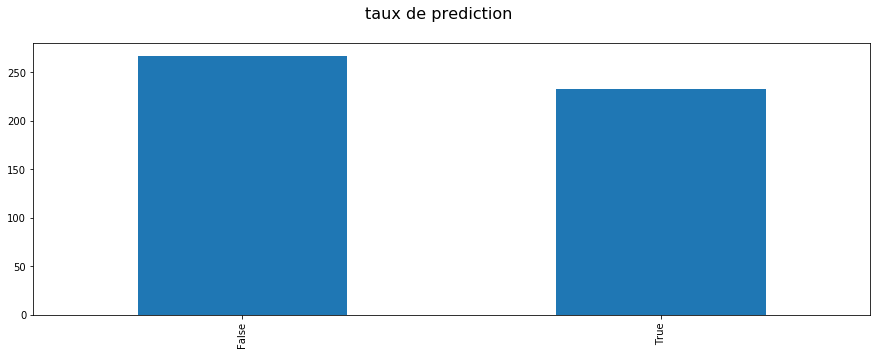

In [35]:
import matplotlib.pyplot as plt
## Graphes
#te = pd.Series(results)
te = pd.Series(big_results[0])
fig=plt.figure(figsize=(15,5))
fig.suptitle('taux de prediction', fontsize=16)
print(te.value_counts())
te.value_counts().plot(kind='bar')

False    267
True     233
dtype: int64


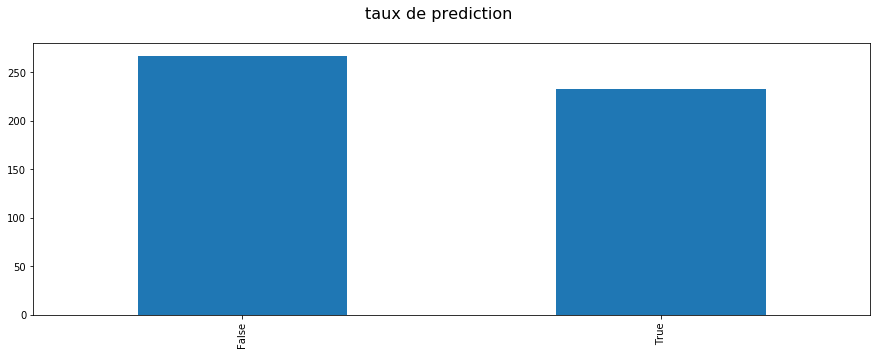

In [39]:
te = pd.Series(big_results[1])
fig=plt.figure(figsize=(15,5))
fig.suptitle('taux de prediction', fontsize=16)
print(te.value_counts())
te.value_counts().plot(kind='bar')

False    267
True     233
dtype: int64


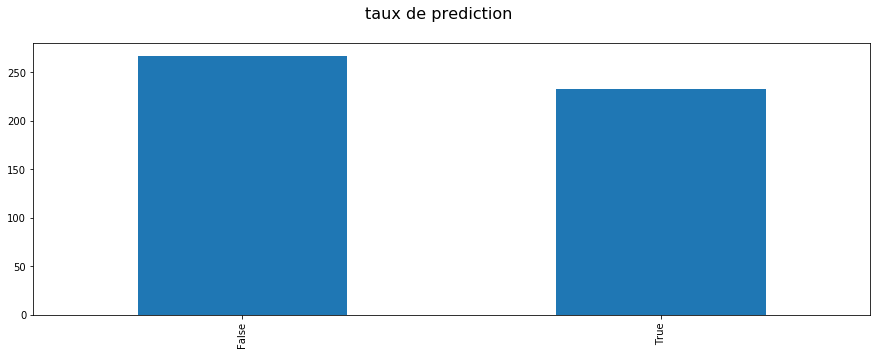

In [40]:
te = pd.Series(big_results[2])
fig=plt.figure(figsize=(15,5))
fig.suptitle('taux de prediction', fontsize=16)
print(te.value_counts())
te.value_counts().plot(kind='bar')

False    267
True     233
dtype: int64


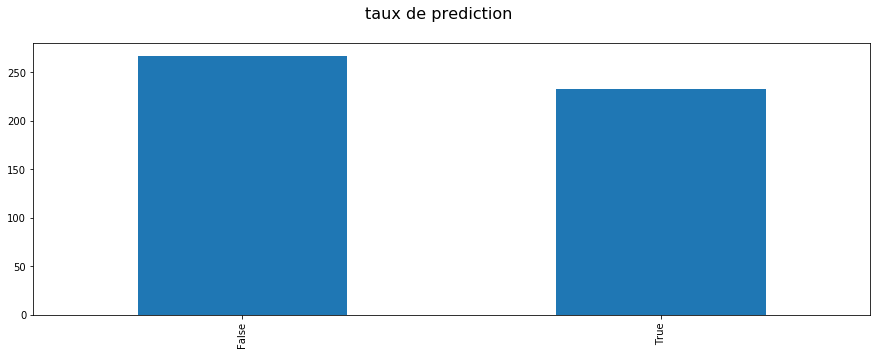

In [41]:
te = pd.Series(big_results[3])
fig=plt.figure(figsize=(15,5))
fig.suptitle('taux de prediction', fontsize=16)
print(te.value_counts())
te.value_counts().plot(kind='bar')